In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
MAG_ZEROPOINT = 32.19

In [80]:
eps = 1e-5
mag_f = lambda f: -2.5 * np.log10(f) + MAG_ZEROPOINT

In [88]:
t = Table.read('/tmp/sourcex/x86_64-fc31-gcc93-dbg/multi_frame/test_multi_modelfitting.py/gsl/output.fits')

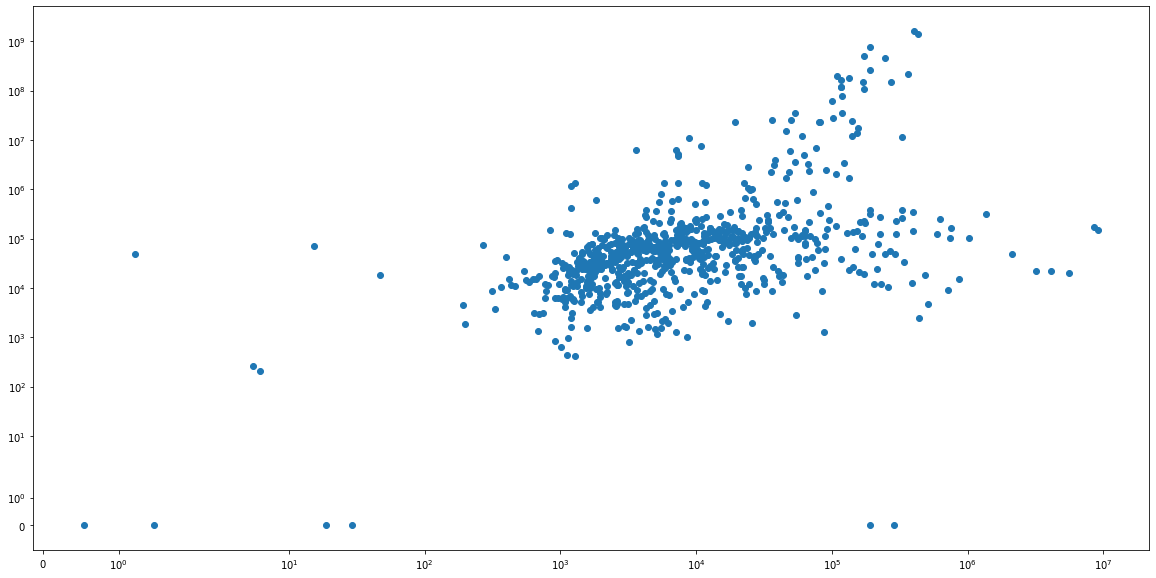

In [107]:
plt.figure()
plt.scatter(t['model_flux_r'], t['model_flux_r_err'])
plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

In [75]:
def deriv(f, v):
    eps = 1e-4
    return (f(v+eps) - f(v-eps)) / (2 * eps)

In [96]:
d = deriv(mag_f, t['model_flux_r'][55])
np.sqrt(d**2 * t['model_flux_r_err'][55]**2)

5.061377722326982

In [100]:
t[55][['model_mag_r', 'model_mag_r_err']]

model_mag_r,model_mag_r_err
float64,float64
22.724491119384766,5.061378002166748


In [105]:
t[t['model_mag_r_err'] > 1e4]

source_id,detection_id,pixel_centroid_x,pixel_centroid_y,world_centroid_alpha,world_centroid_delta,isophotal_flux,isophotal_flux_err,isophotal_mag,isophotal_mag_err,fmf_reduced_chi_2,fmf_iterations,fmf_flags,model_flux_g,model_flux_g_err,model_mag_g,model_mag_g_err,model_bulge_g,model_bulge_g_err,model_flux_r,model_flux_r_err,model_mag_r,model_mag_r_err,model_bulge_r,model_bulge_r_err,model_x,model_x_err,model_y,model_y_err,model_rad,model_rad_err,model_angle,model_angle_err,source_flags
[],[],[pixel],[pixel],[deg],[deg],[count],[count],[mag],[mag],[],[],[],,,,,,,,,,,,,,,,,,,,,[]
int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
768,1549,461.0,2479.0,30.034196853637695,20.06652069091797,139.677978515625,45.52973937988281,26.827178955078125,0.3538971245288849,1.5360687971115112,1,64,0.003283875295892358,131.98947143554688,38.39903259277344,nan,0.002710484666749835,0.0,1.211545467376709,48695.89453125,31.981651306152344,43639.21875,nan,nan,461.70709228515625,0.0,2478.29296875,0.0,70.0008316040039,0.0,0.4971974790096283,0.0,8
